In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
df.nunique()

Date       2290
SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

<Axes: xlabel='SPX', ylabel='GLD'>

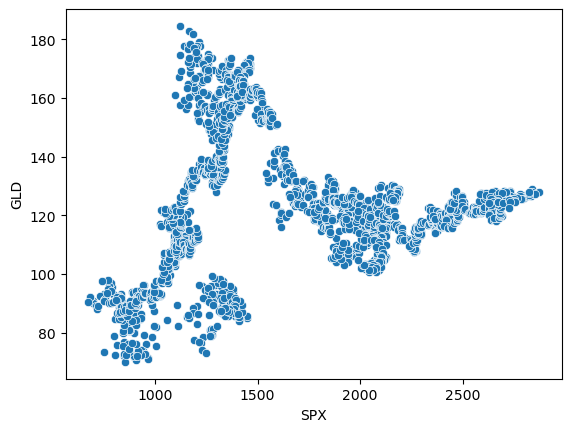

In [7]:
sns.scatterplot(data=df, x='SPX', y='GLD')

<Axes: xlabel='SLV', ylabel='GLD'>

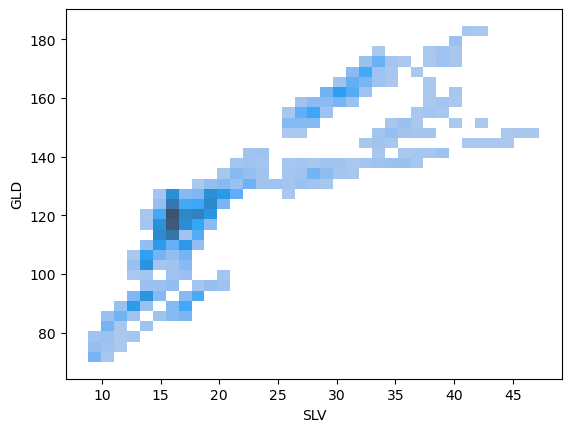

In [8]:
sns.histplot(data=df, x='SLV', y='GLD', kde=True)

In [9]:
#since its not gold price forecasting
df.drop(columns=['Date'], inplace=True)

<Axes: >

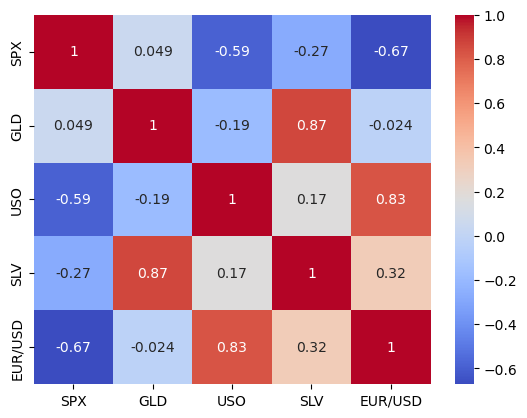

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [11]:
X = df.drop(columns=['GLD'])
y = df['GLD']

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scl_df = pd.DataFrame(X_train_scaled, columns= X_train.columns)
    X_test_scaled = scaler.transform(X_test)
    
    
    model.fit(X_train_scaled, y_train)
    
    pred = model.predict(X_test_scaled)
    
    cv_score = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print('MODEL:', model)
    print('Cv_Score:', cv_score)
    print('MSE:', mean_squared_error(y_test, pred))
    
    return y_test, pred

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_test, pred = train(lr, X,y)

MODEL: LinearRegression()
Cv_Score: 63.74071169763505
MSE: 66.90056688859787


In [14]:
from sklearn.tree import DecisionTreeRegressor
dt =  DecisionTreeRegressor()
y_test, pred = train(dt, X, y)

MODEL: DecisionTreeRegressor()
Cv_Score: 11.761459212089067
MSE: 12.133601582574999


In [15]:
from sklearn.ensemble import ExtraTreesRegressor
Et = ExtraTreesRegressor()
y_testE, predE = train(Et, X, y)

MODEL: ExtraTreesRegressor()
Cv_Score: 4.131728613933061
MSE: 4.127465612871745


In [16]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = [RandomForestRegressor(), GradientBoostingRegressor()]

for model in models:
    y_test, pred = train(model, X, y)

MODEL: RandomForestRegressor()
Cv_Score: 6.233051500697148
MSE: 6.85901112364502
MODEL: GradientBoostingRegressor()
Cv_Score: 10.971370896118943
MSE: 11.584629718340542


Text(0.5, 1.0, 'Actual vs predicted values')

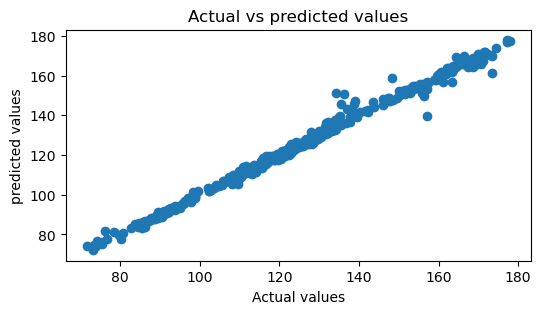

In [17]:
plt.figure(figsize=(6,3))
plt.scatter(y_testE, predE)
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Actual vs predicted values')

Text(0, 0.5, 'Feature')

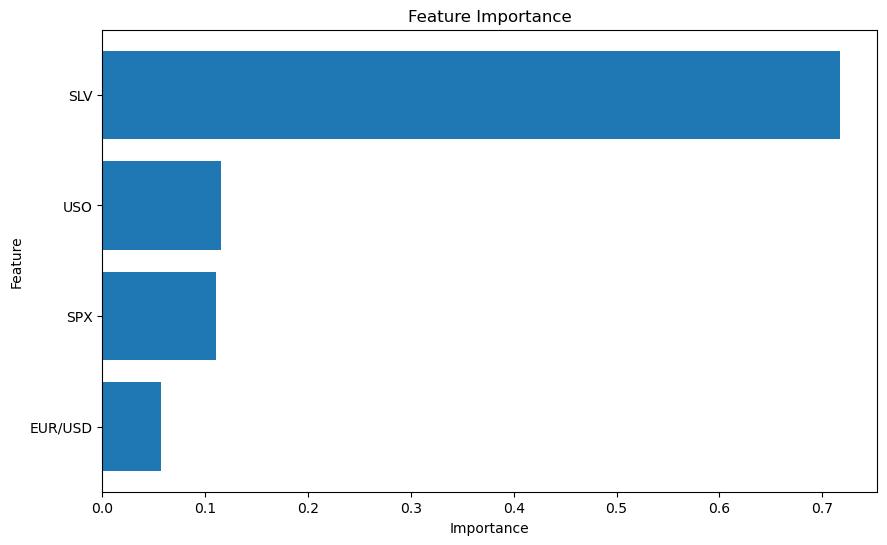

In [20]:
importances = Et.feature_importances_
features = X.columns 

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

Text(0.5, 1.0, 'Residual Plot')

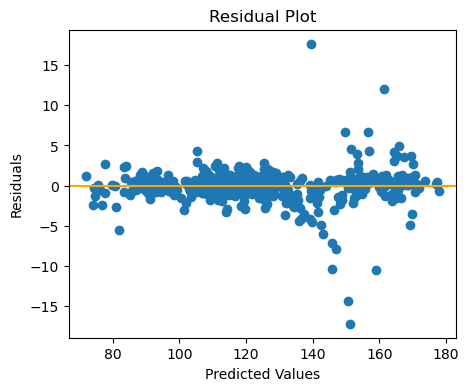

In [30]:
residuals = y_testE - predE

plt.figure(figsize=(5,4))
plt.scatter(predE, residuals)
plt.axhline(y=0, color='orange')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')